In [47]:
# 交易网络的结构motifs和交易的余额变化时间序列的shapelets共同分类
import pandas as pd 
from matplotlib import pyplot as plt
import os 

In [48]:
pwd = os.getcwd()

In [50]:
shapelets_features = pd.read_csv(pwd + '/datasets/open/shapelets_features.csv')
shapelets_features.columns = ['address', 'shapelet0', 'shapelet1', 'shapelet2', 'shapelet3', 'shapelet4', 'shapelet5', 'shapelet6', 'shapelet7', 'shapelet8', 'shapelet9', 'label']
shapelets_features.head()

,address,shapelet0,shapelet1,shapelet2,shapelet3,shapelet4,shapelet5,shapelet6,shapelet7,shapelet8,shapelet9,label
0,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,2.803635,0.338345,6.634261,5.244766,0.221186,2.735242,0.799289,0.823799,7.257098,1.94569,0
1,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,2.803635,0.338345,6.634261,5.244766,0.221186,2.735242,0.823563,0.823799,7.257098,1.94569,0
2,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,2.912674,0.681533,5.655286,4.385881,0.599845,2.189384,1.192823,1.014110,6.681451,2.00001,0
3,0x0061fb5485dff4bb85c078dca80d19119224d97e,2.803635,0.338345,6.634261,5.244766,0.221190,2.735242,1.001982,0.823799,7.045676,1.94569,0
4,0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c,2.803635,0.338345,6.634261,5.244766,0.221187,2.735242,1.001806,0.823799,7.257098,1.94569,0


In [52]:
graphlets_features = pd.read_csv(pwd + '/datasets/open/graphlets_features_old.csv')
graphlets_features.head()

,address,in_degree,out_degree,max_timestamp,min_timestamp,value_out,value_in,balance,count,label,...,motif3,motif4,motif1_ratio,motif2_ratio,motif3_ratio,motif4_ratio,motif1_00_ratio,motif1_01_ratio,motif1_10_ratio,motif1_11_ratio
0,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,4,4,1527595105,1527017753,1.532693,1.533785,-0.001092,4,0,...,10,0,0.500000,0.000000,0.500000,0.0,0.00000,0.00000,0.5,0.500
1,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,5,5,1529893144,1529873859,1.317896,1.318820,-0.000924,5,0,...,0,0,0.350000,0.650000,0.000000,0.0,1.00000,0.00000,0.0,0.000
2,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,93,93,1521405323,1517019863,38.133767,37.556046,0.577721,101,0,...,2,0,0.029940,0.967066,0.002994,0.0,0.65000,0.35000,0.0,0.000
3,0x0061fb5485dff4bb85c078dca80d19119224d97e,12,12,1527854930,1526900270,1.000000,5.045869,-4.045869,12,0,...,0,0,0.111111,0.888889,0.000000,0.0,0.71875,0.15625,0.0,0.125
4,0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c,4,4,1546665655,1539570132,0.679300,0.680000,-0.000700,3,0,...,10,0,0.500000,0.000000,0.500000,0.0,0.00000,0.00000,1.0,0.000


In [53]:
# 合并两个特征集，以address为key
features = pd.merge(graphlets_features, shapelets_features, on='address')
# 删除label_x列
features.drop('label_x', axis=1, inplace=True)
# 重命名label_y列
features.rename(columns={'label_y': 'label'}, inplace=True)
features.head()

,address,in_degree,out_degree,max_timestamp,min_timestamp,value_out,value_in,balance,count,motif1,...,shapelet1,shapelet2,shapelet3,shapelet4,shapelet5,shapelet6,shapelet7,shapelet8,shapelet9,label
0,0x002bf459dc58584d58886169ea0e80f3ca95ffaf,4,4,1527595105,1527017753,1.532693,1.533785,-0.001092,4,10,...,0.338345,6.634261,5.244766,0.221186,2.735242,0.799289,0.823799,7.257098,1.94569,0
1,0x002f0c8119c16d310342d869ca8bf6ace34d9c39,5,5,1529893144,1529873859,1.317896,1.318820,-0.000924,5,14,...,0.338345,6.634261,5.244766,0.221186,2.735242,0.823563,0.823799,7.257098,1.94569,0
2,0x0059b14e35dab1b4eee1e2926c7a5660da66f747,93,93,1521405323,1517019863,38.133767,37.556046,0.577721,101,20,...,0.681533,5.655286,4.385881,0.599845,2.189384,1.192823,1.014110,6.681451,2.00001,0
3,0x0061fb5485dff4bb85c078dca80d19119224d97e,12,12,1527854930,1526900270,1.000000,5.045869,-4.045869,12,32,...,0.338345,6.634261,5.244766,0.221190,2.735242,1.001982,0.823799,7.045676,1.94569,0
4,0x00650a784ee109797ba8c05f3496bdbf2b2b7a1c,4,4,1546665655,1539570132,0.679300,0.680000,-0.000700,3,10,...,0.338345,6.634261,5.244766,0.221187,2.735242,1.001806,0.823799,7.257098,1.94569,0


### 只使用features

In [54]:
# graphlets特征
key_features_name = ['balance','count', 'label']
key_features = features[key_features_name]
key_features.head()

,balance,count,label
0,-0.001092,4,0
1,-0.000924,5,0
2,0.577721,101,0
3,-4.045869,12,0
4,-0.000700,3,0


In [55]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(key_features.iloc[:, :-1], key_features.iloc[:, -1], test_size=0.2, random_state=0)

# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.8470    0.9497    0.8954       338
           1     0.9420    0.8263    0.8804       334

    accuracy                         0.8884       672
   macro avg     0.8945    0.8880    0.8879       672
weighted avg     0.8942    0.8884    0.8879       672



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


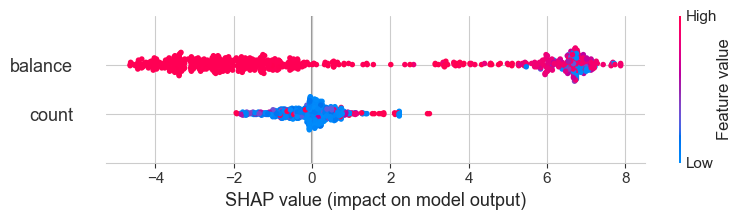

In [56]:
# SHAP解释样本

import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


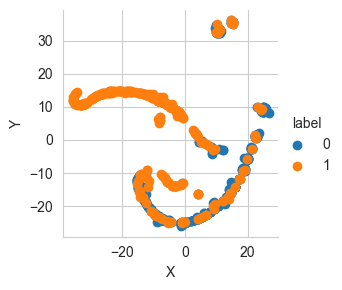

In [57]:
# 对特征画t-SNE图
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(X_test)

tsne_df = pd.DataFrame({'X': tsne_obj[:, 0], 'Y': tsne_obj[:, 1], 'label': y_test})

# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label").map(plt.scatter, "X", "Y").add_legend()
plt.show()


### 只使用graplets特征

In [58]:
# graphlets特征
key_features_name = ['motif1_ratio', 'motif2_ratio', 'motif3_ratio', 'motif1_00_ratio', 'motif1_01_ratio', 'motif1_10_ratio', 'motif1_11_ratio', 'label']
key_features = features[key_features_name]
key_features.head()

,motif1_ratio,motif2_ratio,motif3_ratio,motif1_00_ratio,motif1_01_ratio,motif1_10_ratio,motif1_11_ratio,label
0,0.500000,0.000000,0.500000,0.00000,0.00000,0.5,0.500,0
1,0.350000,0.650000,0.000000,1.00000,0.00000,0.0,0.000,0
2,0.029940,0.967066,0.002994,0.65000,0.35000,0.0,0.000,0
3,0.111111,0.888889,0.000000,0.71875,0.15625,0.0,0.125,0
4,0.500000,0.000000,0.500000,0.00000,0.00000,1.0,0.000,0


In [59]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(key_features.iloc[:, :-1], key_features.iloc[:, -1], test_size=0.2, random_state=0)

# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.7890    0.7189    0.7523       338
           1     0.7390    0.8054    0.7708       334

    accuracy                         0.7619       672
   macro avg     0.7640    0.7622    0.7615       672
weighted avg     0.7641    0.7619    0.7615       672



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


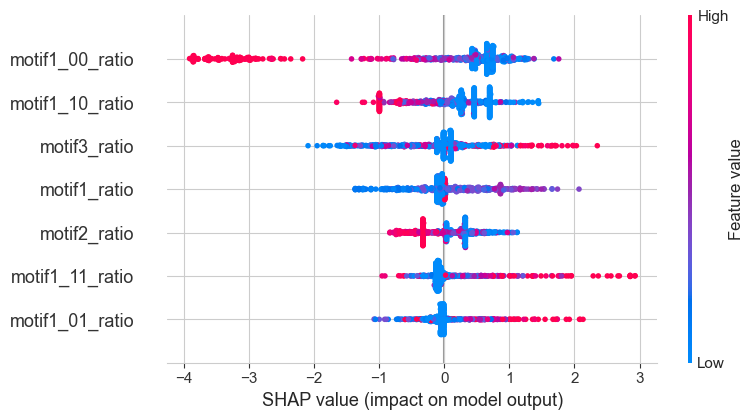

In [60]:
# SHAP解释样本

import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


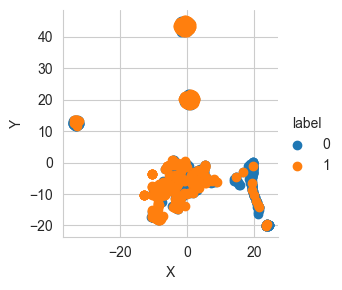

In [61]:
# 对特征画t-SNE图
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(X_test)

tsne_df = pd.DataFrame({'X': tsne_obj[:, 0], 'Y': tsne_obj[:, 1], 'label': y_test})

# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label").map(plt.scatter, "X", "Y").add_legend()
plt.show()


### 使用shapelets特征

In [75]:
# 定义要使用的特征
key_features_name = ['shapelet0', 'shapelet1', 'shapelet2', 'shapelet3', 'shapelet4', 'shapelet5', 'shapelet6', 'shapelet7', 'shapelet8', 'shapelet9', 'label']
key_features = features[key_features_name]
key_features.head()

,shapelet0,shapelet1,shapelet2,shapelet3,shapelet4,shapelet5,shapelet6,shapelet7,shapelet8,shapelet9,label
0,2.803635,0.338345,6.634261,5.244766,0.221186,2.735242,0.799289,0.823799,7.257098,1.94569,0
1,2.803635,0.338345,6.634261,5.244766,0.221186,2.735242,0.823563,0.823799,7.257098,1.94569,0
2,2.912674,0.681533,5.655286,4.385881,0.599845,2.189384,1.192823,1.014110,6.681451,2.00001,0
3,2.803635,0.338345,6.634261,5.244766,0.221190,2.735242,1.001982,0.823799,7.045676,1.94569,0
4,2.803635,0.338345,6.634261,5.244766,0.221187,2.735242,1.001806,0.823799,7.257098,1.94569,0


In [76]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(key_features.iloc[:, :-1], key_features.iloc[:, -1], test_size=0.2, random_state=0)

# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9368    0.9645    0.9504       338
           1     0.9630    0.9341    0.9483       334

    accuracy                         0.9494       672
   macro avg     0.9499    0.9493    0.9494       672
weighted avg     0.9498    0.9494    0.9494       672



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


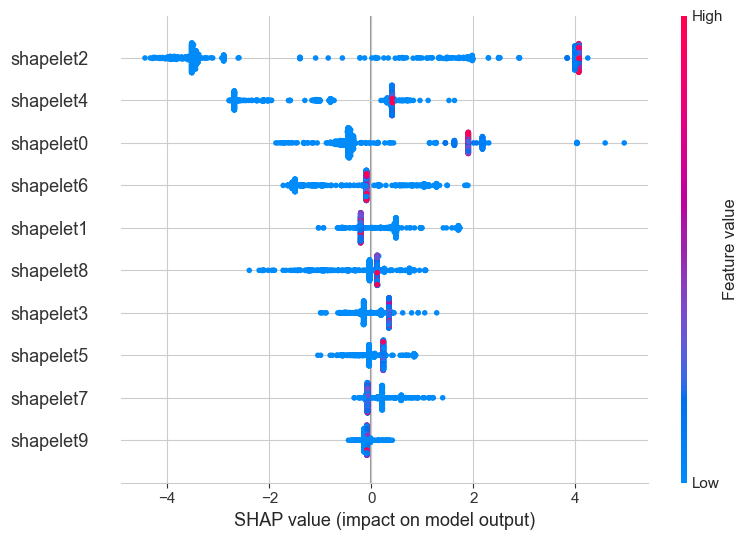

In [77]:
# SHAP解释样本

import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


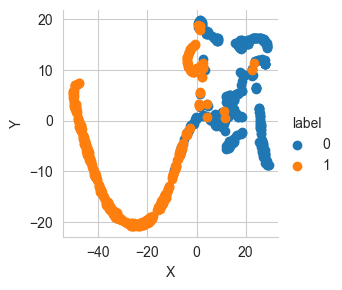

In [78]:
# 对特征画t-SNE图
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(X_test)

tsne_df = pd.DataFrame({'X': tsne_obj[:, 0], 'Y': tsne_obj[:, 1], 'label': y_test})

# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label").map(plt.scatter, "X", "Y").add_legend()
plt.show()


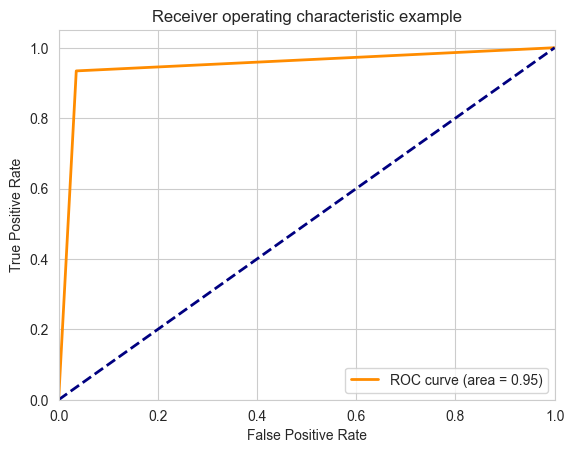

In [79]:
# ROC曲线
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 使用graphlets和shapelets特征

In [80]:
# 定义要使用的特征
key_features_name = ['motif1_ratio', 'motif2_ratio', 'motif3_ratio', 'motif1_00_ratio', 'motif1_01_ratio', 'motif1_10_ratio', 'motif1_11_ratio', 'shapelet0', 'shapelet1', 'shapelet2', 'shapelet3', 'shapelet4', 'shapelet5', 'shapelet6', 'shapelet7', 'shapelet8', 'shapelet9',  'label']
key_features = features[key_features_name]
key_features.head()

,motif1_ratio,motif2_ratio,motif3_ratio,motif1_00_ratio,motif1_01_ratio,motif1_10_ratio,motif1_11_ratio,shapelet0,shapelet1,shapelet2,shapelet3,shapelet4,shapelet5,shapelet6,shapelet7,shapelet8,shapelet9,label
0,0.500000,0.000000,0.500000,0.00000,0.00000,0.5,0.500,2.803635,0.338345,6.634261,5.244766,0.221186,2.735242,0.799289,0.823799,7.257098,1.94569,0
1,0.350000,0.650000,0.000000,1.00000,0.00000,0.0,0.000,2.803635,0.338345,6.634261,5.244766,0.221186,2.735242,0.823563,0.823799,7.257098,1.94569,0
2,0.029940,0.967066,0.002994,0.65000,0.35000,0.0,0.000,2.912674,0.681533,5.655286,4.385881,0.599845,2.189384,1.192823,1.014110,6.681451,2.00001,0
3,0.111111,0.888889,0.000000,0.71875,0.15625,0.0,0.125,2.803635,0.338345,6.634261,5.244766,0.221190,2.735242,1.001982,0.823799,7.045676,1.94569,0
4,0.500000,0.000000,0.500000,0.00000,0.00000,1.0,0.000,2.803635,0.338345,6.634261,5.244766,0.221187,2.735242,1.001806,0.823799,7.257098,1.94569,0


In [81]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(key_features.iloc[:, :-1], key_features.iloc[:, -1], test_size=0.2, random_state=0)

# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9649    0.9763    0.9706       338
           1     0.9758    0.9641    0.9699       334

    accuracy                         0.9702       672
   macro avg     0.9703    0.9702    0.9702       672
weighted avg     0.9703    0.9702    0.9702       672



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


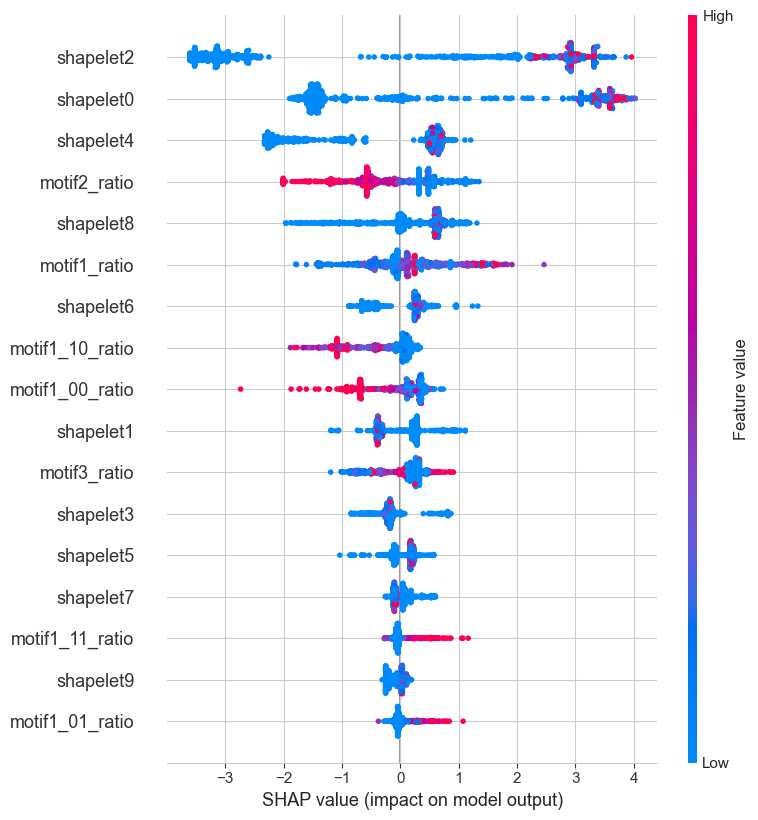

In [82]:
# SHAP解释样本

import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)


The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


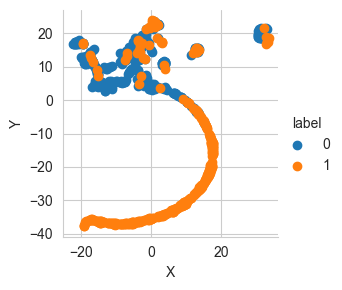

In [83]:
# 对特征画t-SNE图
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(X_test)

tsne_df = pd.DataFrame({'X': tsne_obj[:, 0], 'Y': tsne_obj[:, 1], 'label': y_test})

# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label").map(plt.scatter, "X", "Y").add_legend()
plt.show()


### shapelets、graphlets、节点特征

In [84]:
# 定义要使用的特征
key_features_name = ['balance', 'count', 'motif1_ratio', 'motif2_ratio', 'motif3_ratio', 'motif1_00_ratio', 'motif1_01_ratio', 'motif1_10_ratio', 'motif1_11_ratio', 'shapelet1', 'shapelet2', 'shapelet3', 'shapelet4', 'shapelet5', 'shapelet6', 'shapelet7', 'shapelet8', 'shapelet9', 'label']
key_features = features[key_features_name]
key_features.head()

,balance,count,motif1_ratio,motif2_ratio,motif3_ratio,motif1_00_ratio,motif1_01_ratio,motif1_10_ratio,motif1_11_ratio,shapelet1,shapelet2,shapelet3,shapelet4,shapelet5,shapelet6,shapelet7,shapelet8,shapelet9,label
0,-0.001092,4,0.500000,0.000000,0.500000,0.00000,0.00000,0.5,0.500,0.338345,6.634261,5.244766,0.221186,2.735242,0.799289,0.823799,7.257098,1.94569,0
1,-0.000924,5,0.350000,0.650000,0.000000,1.00000,0.00000,0.0,0.000,0.338345,6.634261,5.244766,0.221186,2.735242,0.823563,0.823799,7.257098,1.94569,0
2,0.577721,101,0.029940,0.967066,0.002994,0.65000,0.35000,0.0,0.000,0.681533,5.655286,4.385881,0.599845,2.189384,1.192823,1.014110,6.681451,2.00001,0
3,-4.045869,12,0.111111,0.888889,0.000000,0.71875,0.15625,0.0,0.125,0.338345,6.634261,5.244766,0.221190,2.735242,1.001982,0.823799,7.045676,1.94569,0
4,-0.000700,3,0.500000,0.000000,0.500000,0.00000,0.00000,1.0,0.000,0.338345,6.634261,5.244766,0.221187,2.735242,1.001806,0.823799,7.257098,1.94569,0


In [85]:
# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(key_features.iloc[:, :-1], key_features.iloc[:, -1], test_size=0.2, random_state=0)

In [86]:
# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9940    0.9882    0.9911       338
           1     0.9881    0.9940    0.9910       334

    accuracy                         0.9911       672
   macro avg     0.9911    0.9911    0.9911       672
weighted avg     0.9911    0.9911    0.9911       672



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


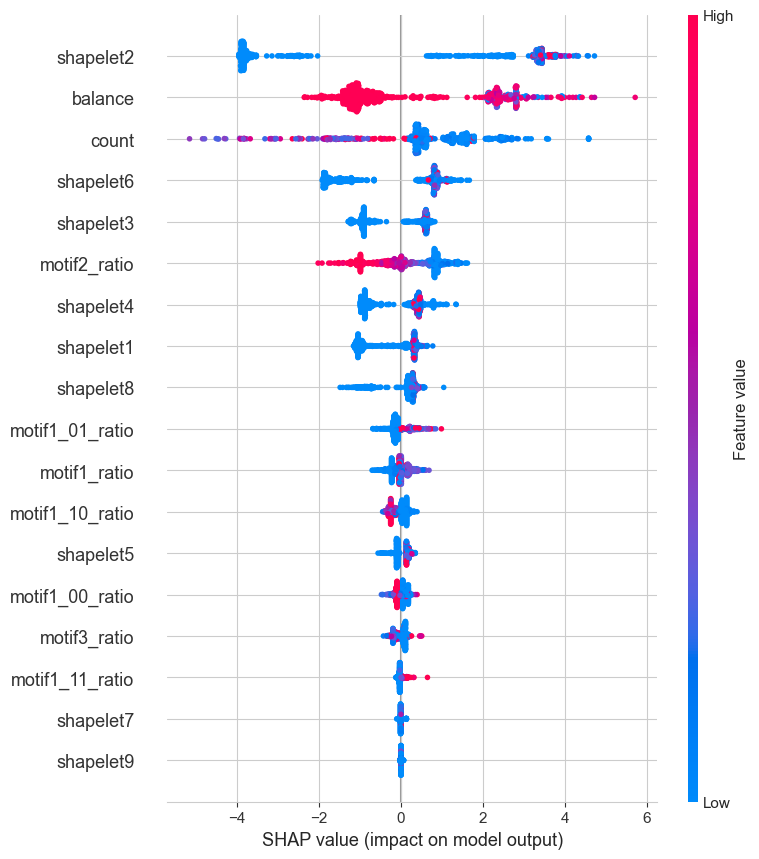

In [87]:
# SHAP解释样本

import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)


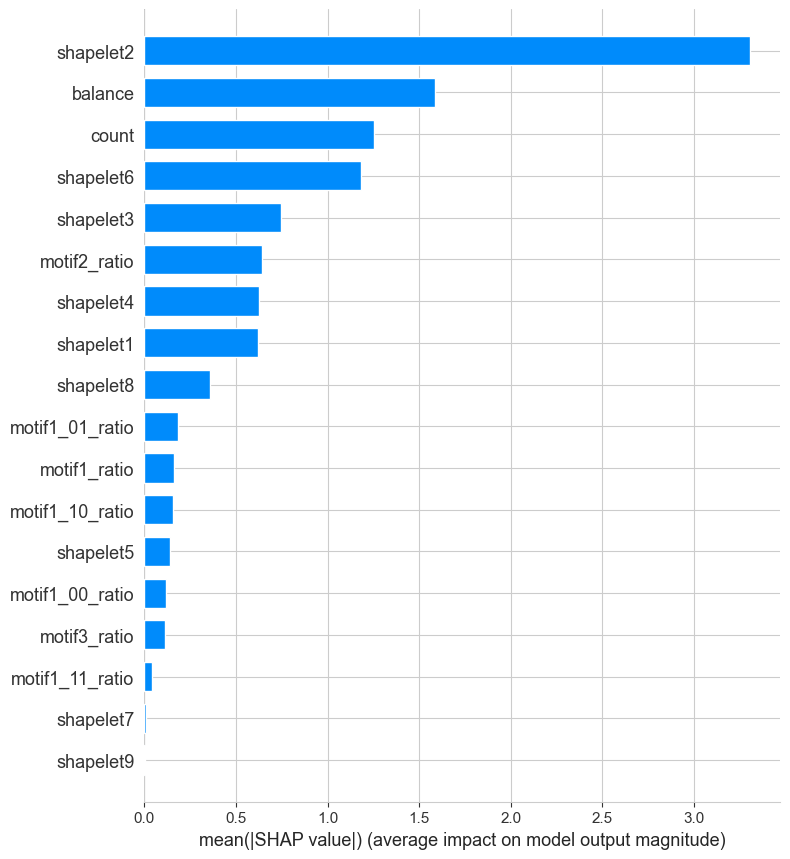

In [88]:
# SHAP输出特征重要性
shap.summary_plot(shap_values, X_test, plot_type="bar")

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.


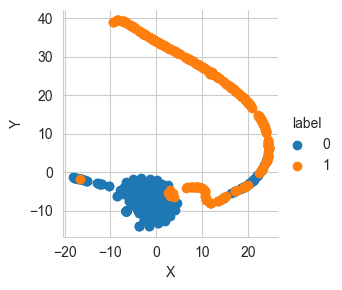

In [94]:
# 对特征画t-SNE图
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0)
tsne_obj = tsne.fit_transform(X_test)

tsne_df = pd.DataFrame({'X': tsne_obj[:, 0], 'Y': tsne_obj[:, 1], 'label': y_test})

# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label").map(plt.scatter, "X", "Y").add_legend()
plt.show()


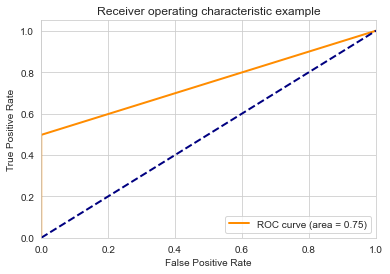

In [ ]:
# ROC曲线
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
            lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### 只使用motif1_00_ratio和shapelet1

In [90]:

key_features_name = ['shapelet1', 'label']
key_features = features[key_features_name]

# 划分数据集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(key_features.iloc[:, :-1], key_features.iloc[:, -1], test_size=0.2, random_state=0)

# xgboost
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# 预测
y_pred = xgb_model.predict(X_test)

# 评估
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9327    0.9438    0.9382       338
           1     0.9424    0.9311    0.9367       334

    accuracy                         0.9375       672
   macro avg     0.9376    0.9375    0.9375       672
weighted avg     0.9376    0.9375    0.9375       672



ntree_limit is deprecated, use `iteration_range` or model slicing instead.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


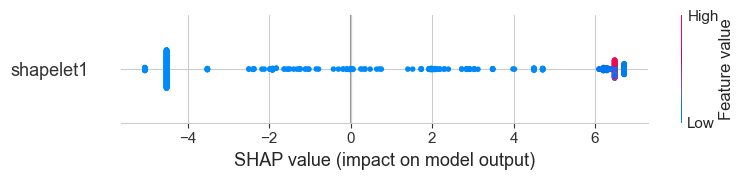

In [91]:
# SHAP解释样本
import shap

explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_test)

shap.initjs()
# shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

shap.summary_plot(shap_values, X_test)

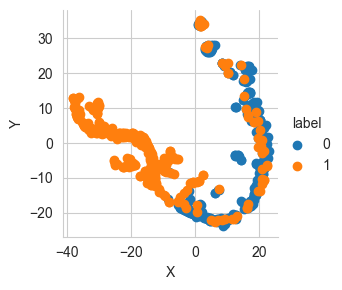

In [93]:
# 画图
import seaborn as sns

sns.set_style("whitegrid")
sns.FacetGrid(tsne_df, hue="label").map(plt.scatter, "X", "Y").add_legend()
plt.show()